# BT4012 Fraud Analytics – Exploratory Data Analysis

# Imports and Configs

In [1]:
import os
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
data_dir = "."

loan_path = os.path.join(data_dir, "loan_applications.csv")
txn_path = os.path.join(data_dir, "transactions.csv")

loan_df = pd.read_csv(loan_path)
txn_df = pd.read_csv(txn_path)

loan_rows = loan_df.shape[0]
txn_rows = txn_df.shape[0]
print("Number of rows in Loan Applications dataset:", loan_rows)
print("Number of rows in Transactions dataset:", txn_rows)

display(loan_df.head())
display(txn_df.head())

Number of rows in Loan Applications dataset: 50000
Number of rows in Transactions dataset: 50000


,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


# EDA



Loan data info:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
application_id,50000,50000,c8bf0bea-70e6-4870-9125-41b8210c527f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,50000,18314,CUST100339,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
application_date,50000,1096,2024-05-26,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,50000,5,Home Loan,10056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount_requested,50000.0,NaN,NaN,NaN,513913.04,275212.571219,100000.0,300000.0,503000.0,701000.0,1618000.0
loan_tenure_months,50000.0,NaN,NaN,NaN,121.3884,121.4104,12.0,24.0,60.0,240.0,360.0
interest_rate_offered,50000.0,NaN,NaN,NaN,10.528547,1.926442,7.0,9.15,10.51,11.85,19.62
purpose_of_loan,50000,7,Home Renovation,7230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_status,50000,6,Retired,8534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_income,50000.0,NaN,NaN,NaN,50844.94,23874.742237,10000.0,33600.0,50300.0,67300.0,162000.0



Transactions data info:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,50000,50000,2d7ddfd4-1112-4354-a2dd-fad94b45a850,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,50000,18318,CUST110321,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,50000,30012,2022-01-24 01:48:00,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_type,50000,10,Debit Card,5088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_amount,50000.0,NaN,NaN,NaN,5005.674329,5070.810305,100.0,1400.0,3461.50591,6900.0,76531.610223
merchant_category,50000,12,Utilities,4256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_name,50000,35312,Kala Inc,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_location,50000,8823,"Ghaziabad, Maharashtra",22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_balance_after_transaction,50000.0,NaN,NaN,NaN,21930.235669,14621.954095,0.0,9237.0,21586.5,33994.25,89097.0
is_international_transaction,50000.0,NaN,NaN,NaN,0.01044,0.101643,0.0,0.0,0.0,0.0,1.0



Fraud flag distribution:
fraud_flag
0    97.948
1     2.052
Name: proportion, dtype: float64


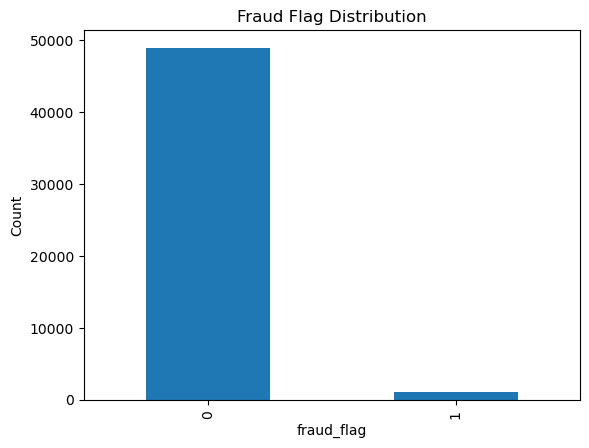

In [3]:
print("\nLoan data info:")
display(loan_df.describe(include="all").T.head(20))

print("\nTransactions data info:")
display(txn_df.describe(include="all").T.head(20))

print("\nFraud flag distribution:")
print(loan_df["fraud_flag"].value_counts(normalize=True) * 100)

loan_df["fraud_flag"].value_counts().plot(kind="bar")
plt.title("Fraud Flag Distribution")
plt.xlabel("fraud_flag")
plt.ylabel("Count")
plt.show()

In [4]:
# --- Plotting Functions ---

def plot_numerical_distribution(df, columns, title):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} - {title}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def plot_categorical_distribution(df, columns, title):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col} - {title}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

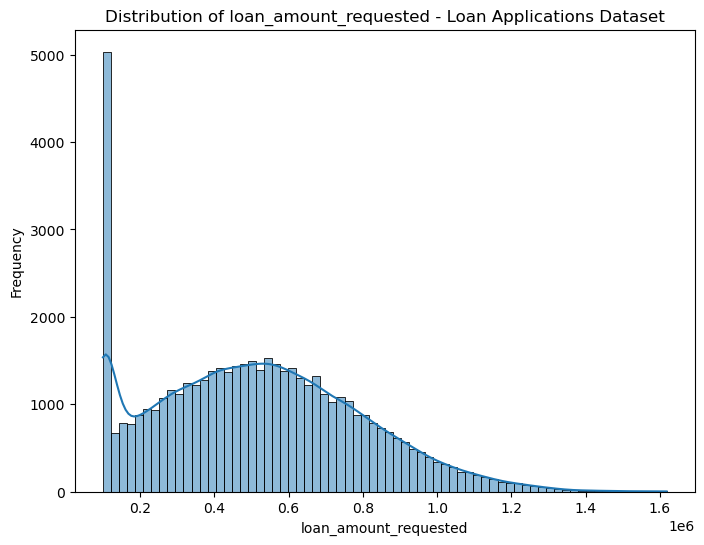

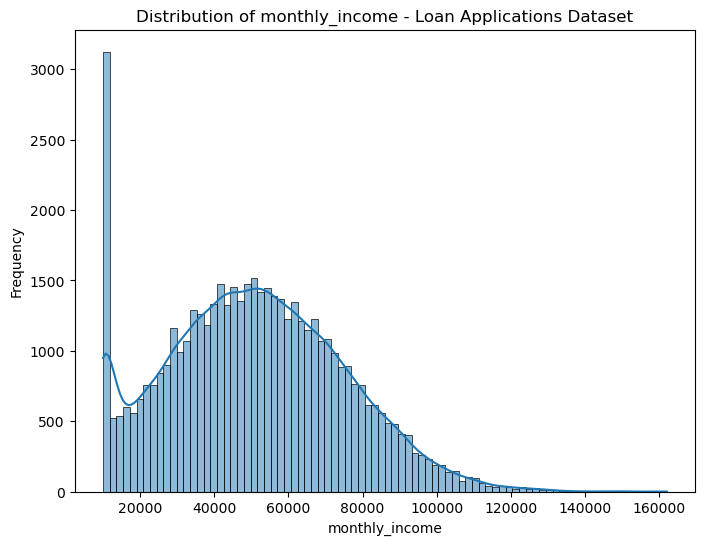

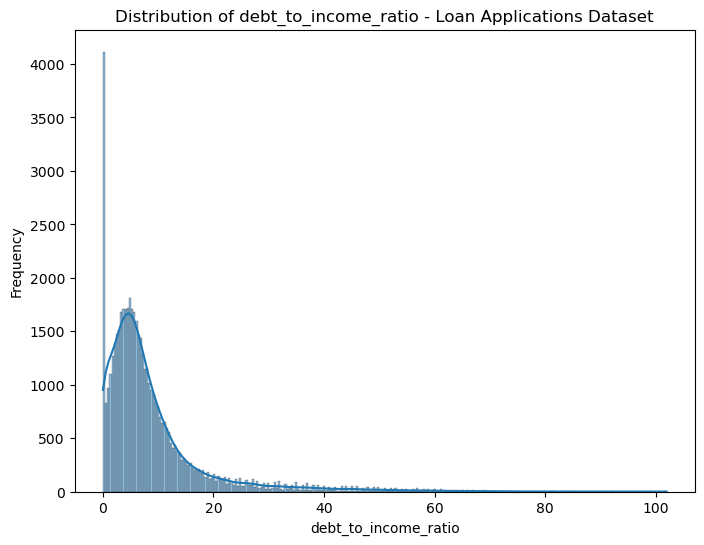

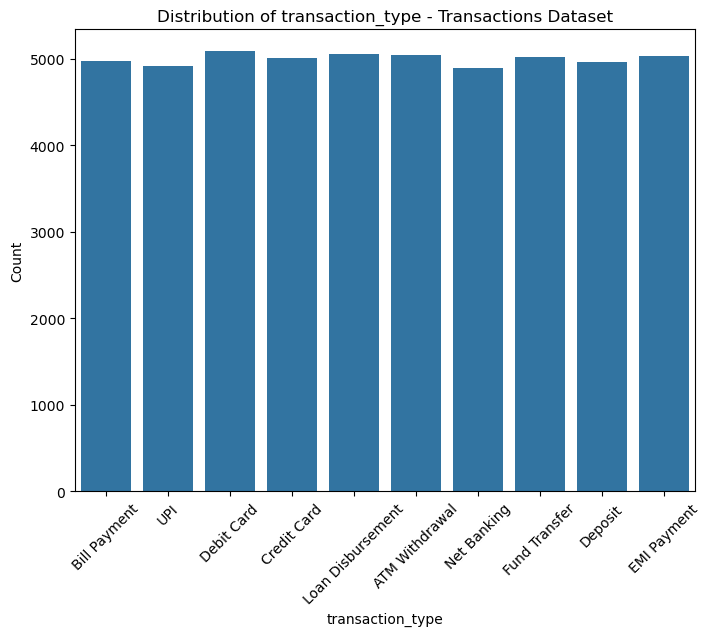

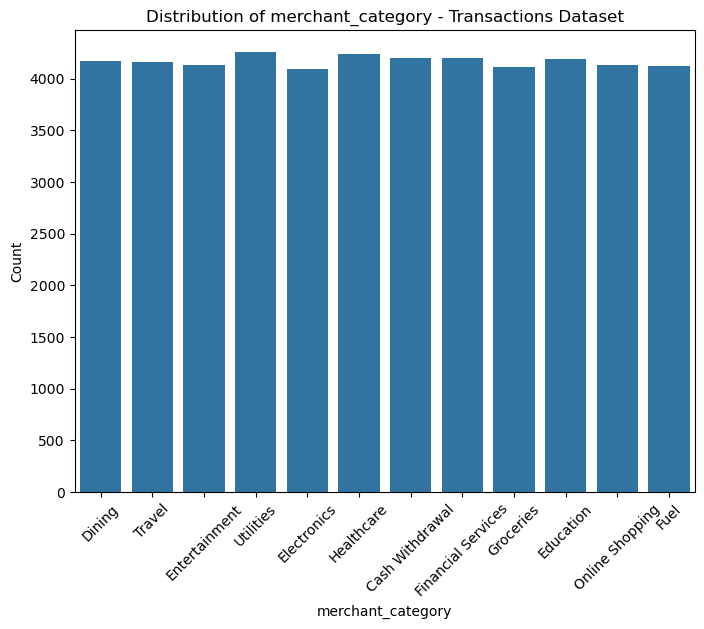

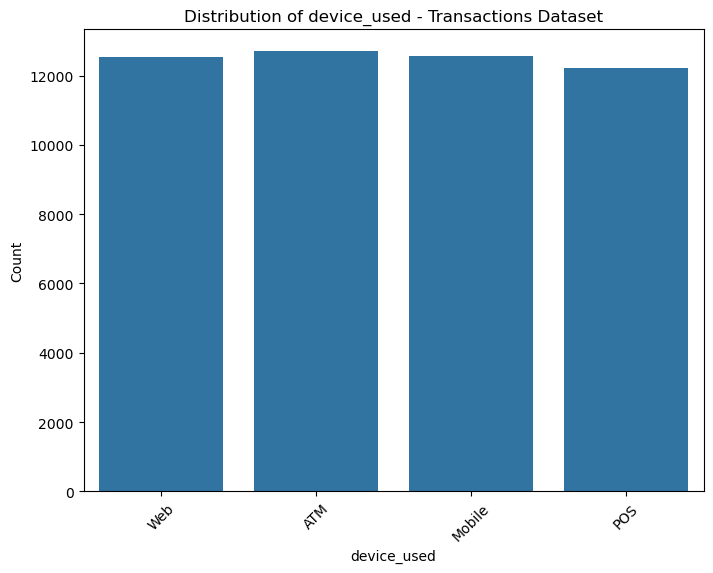

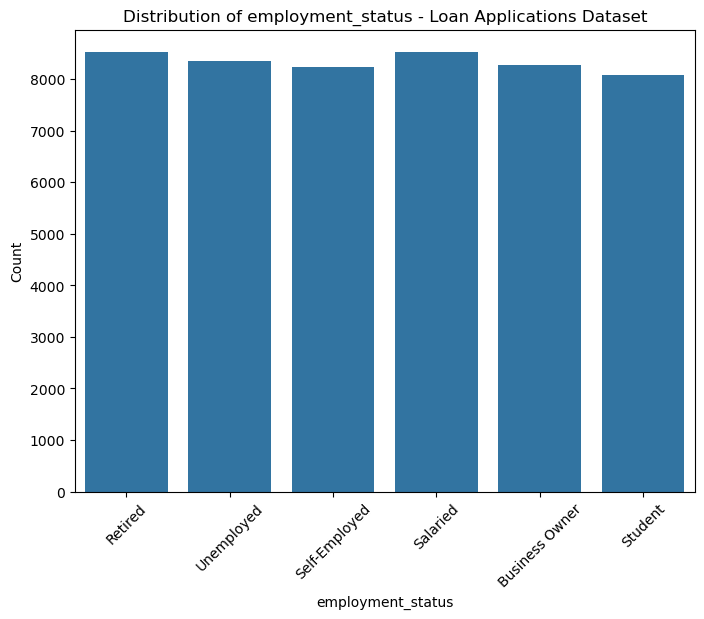

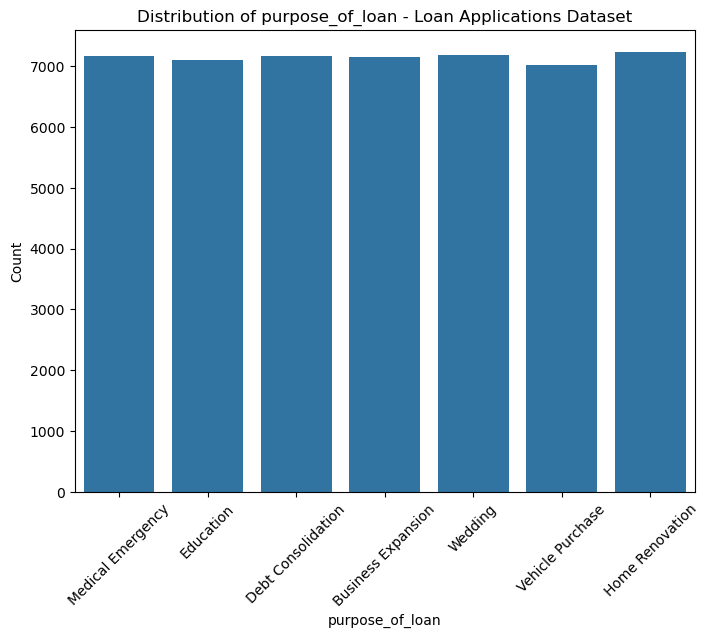

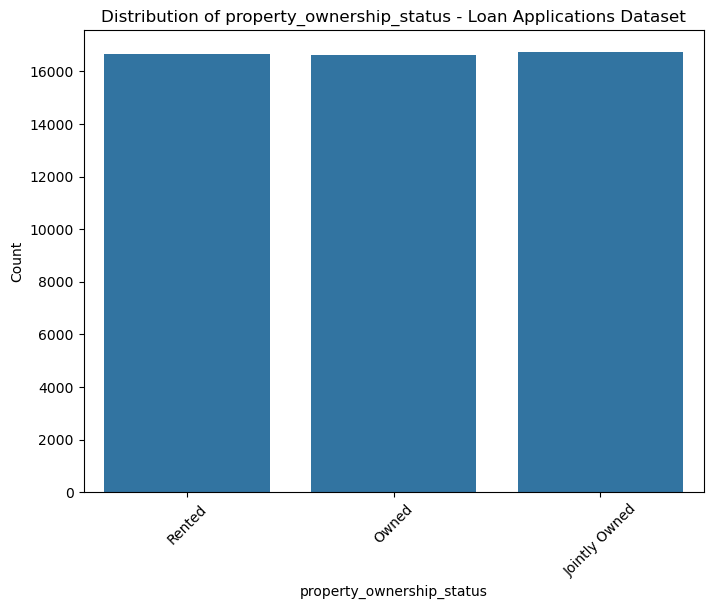

In [5]:
# --- Plotting Calls ---

# Update the column names in numerical_columns_loans to match the actual columns
numerical_columns_loans = ['loan_amount_requested', 'monthly_income', 'debt_to_income_ratio']
plot_numerical_distribution(loan_df, numerical_columns_loans, 'Loan Applications Dataset')

# Plot categorical feature distributions for transactions
categorical_columns_transactions = ['transaction_type', 'merchant_category', 'device_used']
plot_categorical_distribution(txn_df, categorical_columns_transactions, 'Transactions Dataset')

# Plot categorical feature distributions for loan applications
categorical_columns_loans = ['employment_status', 'purpose_of_loan', 'property_ownership_status']
plot_categorical_distribution(loan_df, categorical_columns_loans, 'Loan Applications Dataset')